In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
 
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import *
from keras.utils import np_utils
import h5py
import numpy as np
import tensorflow as tf

from preprocessing.make_keras_input_new import data
X_train, y_train, X_test, y_test = data(mode='hiragana')
n_output = y_train.shape[1]

weights_path = 'weights/keras_VGG-B-plot-hiragana_weights.h5'

from models import VGG_B

model = VGG_B(n_output = n_output,weights_path = weights_path)

adam = Adam(lr=1e-4)

model.compile(loss='categorical_crossentropy',
              optimizer=adam)

Using TensorFlow backend.


In [4]:
from keras import backend as K
import h5py
# with a Sequential model
def get_layer_output(n_layer, input_data, model):
    layer_outputter = K.function([model.layers[0].input],
                                 [model.layers[n_layer].get_output(train=False)])
    return layer_outputter([input_data])[0]

def get_layer_weights(n_layer, filepath):
    f = h5py.File(filepath, mode='r')
    g = f['layer_{}'.format(n_layer)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    return weights

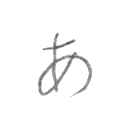

In [4]:
import struct
from PIL import Image
def read_record_ETL8G(f):
    s = f.read(8199)
    r = struct.unpack('>2H8sI4B4H2B30x8128s11x', s)
    iF = Image.frombytes('F', (128, 127), r[14], 'bit', 4)
    iL = iF.convert('L')
    return r + (iL,)
filename = 'ETLC/ETL8G/ETL8G_17'
id_record = 0
with open(filename, 'r') as f:
    f.seek(id_record * 4780)
    r = read_record_ETL8G(f)
iE = Image.eval(r[-1], lambda x: 255-x*20)
iE.save('final_report/input_a.png', 'PNG')
iE

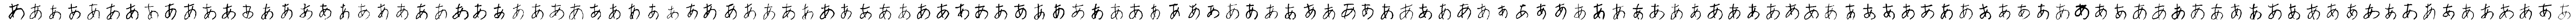

In [5]:
char_class = 0
ids = np.where(y_train[:,char_class] == 1)

fig = plt.figure(figsize=(len(ids[0]),3))
for i, idx in enumerate(ids[0]):
    ax = fig.add_subplot(1,len(ids[0]),i+1)
    imshow(X_train[idx][0],cmap=plt.cm.binary_r)
    ax.axis('off')
# plt.savefig('final_report/input_binarized.pdf')
plt.savefig('all.pdf')

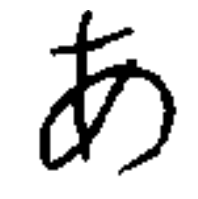

In [6]:
char_class = 0
ids = np.where(y_train[:,char_class] == 1)[0]
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
imshow(X_train[ids[47]][0],cmap=plt.cm.binary_r)
ax.axis('off')
plt.savefig('final_report/input_binarized.pdf')


In [7]:
ids[47]

3320

In [8]:
X_train[3320].shape

(1, 64, 64)

In [6]:
X_train_k, y_train_k, X_test_k, y_test_k = data(writersPerChar =2, mode='katakana')
X_train_kj, y_train_kj, X_test_kj, y_test_kj = data(writersPerChar =2, mode='kanji')


Reached end of record
Reached end of record
Reached end of record
Reached end of record
Reached end of record


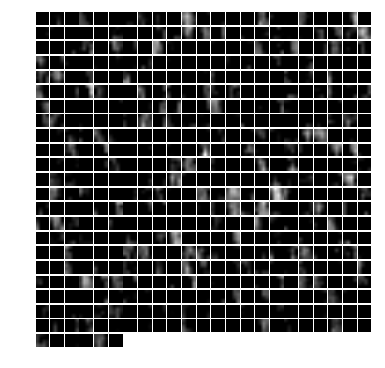

In [8]:
conv=20
layer_output = get_layer_output(conv,[X_test_kj[0]], model)
n_sqrt = int(np.ceil(np.sqrt(layer_output.shape[1])))
shape = (n_sqrt, n_sqrt)
fig = plt.figure(figsize=(6,6))
n_images = layer_output.shape[1]
for i in xrange(n_images):
    ax = fig.add_subplot(shape[0],shape[1],i+1)
    ax.axis('off')
    cmap = plt.cm.binary_r
    imshow(layer_output[0][i],
           vmin=np.min(layer_output[0]),
#            vmin=0,
           vmax=np.max(layer_output[0]), 
#            vmax=1,
           cmap=cmap)
plt.subplots_adjust(hspace=0.15,wspace=0.15)
plt.savefig('final_report/VGG-B-'+str(conv)+'.pdf')

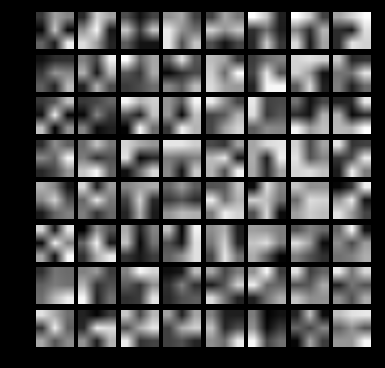

In [96]:
conv = 0
weight_output = get_layer_weights(conv, weights_path)
n_sqrt = int(np.ceil(np.sqrt(weight_output[0].shape[0])))

fig = plt.figure(figsize=(6,6), facecolor="black")
n_images = weight_output[0].shape[0]
for i in xrange(n_images):
    ax = fig.add_subplot(n_sqrt,n_sqrt,i+1)
    ax.axis('off')
    imshow(weight_output[0][i][0],
           vmin=np.min(weight_output[0]),
           vmax=np.max(weight_output[0]), 
           cmap=plt.cm.binary_r)
plt.subplots_adjust(hspace=0.15,wspace=0.15)
plt.savefig('final_report/VGG-B-weights-conv'+str(conv)+'.pdf')

In [97]:
weight_output[0][i].shape

(1, 3, 3)